In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime
from scipy import stats

In [3]:
rainfall = pd.read_csv("Percipitation.csv")
rainfall

,date,rainfall_interval
0,1/1/14 0:00,0.0
1,1/1/14 0:15,0.0
2,1/1/14 0:30,0.0
3,1/1/14 0:45,0.0
4,1/1/14 1:00,0.0
...,...,...
350587,12/31/23 22:45,0.0
350588,12/31/23 23:00,0.0
350589,12/31/23 23:15,0.0
350590,12/31/23 23:30,0.0


In [4]:
rainfall['date'] = pd.to_datetime(rainfall['date'])

C:\Users\ndugl\AppData\Local\Temp\ipykernel_38036\1668117652.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rainfall['date'] = pd.to_datetime(rainfall['date'])


In [5]:
rainfall

,date,rainfall_interval
0,2014-01-01 00:00:00,0.0
1,2014-01-01 00:15:00,0.0
2,2014-01-01 00:30:00,0.0
3,2014-01-01 00:45:00,0.0
4,2014-01-01 01:00:00,0.0
...,...,...
350587,2023-12-31 22:45:00,0.0
350588,2023-12-31 23:00:00,0.0
350589,2023-12-31 23:15:00,0.0
350590,2023-12-31 23:30:00,0.0


### Average per Day 

In [6]:
rainfall['date_only'] = rainfall['date'].dt.date

# Now, group by 'date_only' and calculate the average rainfall_interval per day
daily_avg_rainfall = rainfall.groupby('date_only')['rainfall_interval'].mean().reset_index()
daily_avg_rainfall

,date_only,rainfall_interval
0,2014-01-01,0.000000
1,2014-01-02,0.000000
2,2014-01-03,0.000000
3,2014-01-04,0.000000
4,2014-01-05,0.000000
...,...,...
3647,2023-12-27,0.007500
3648,2023-12-28,0.000417
3649,2023-12-29,0.000000
3650,2023-12-30,0.000000


### Average per Month

In [7]:
daily_avg_rainfall['date'] = pd.to_datetime(daily_avg_rainfall['date_only'])


In [8]:
daily_avg_rainfall['year_month'] = daily_avg_rainfall['date'].dt.to_period('M')

monthly_avg_rainfall = daily_avg_rainfall.groupby('year_month')['rainfall_interval'].mean().reset_index()

monthly_avg_rainfall

,year_month,rainfall_interval
0,2014-01,0.000040
1,2014-02,0.000000
2,2014-03,0.000000
3,2014-04,0.000472
4,2014-05,0.000000
...,...,...
115,2023-08,0.000027
116,2023-09,0.000181
117,2023-10,0.000040
118,2023-11,0.000653


### Threshold

In [9]:
monthly_avg_rainfall["rainfall_interval"].mean()

0.0007858229731300505

### looking at the Zscore and P-value

In [10]:
monthly_avg_rainfall['z_score'] = stats.zscore(monthly_avg_rainfall['rainfall_interval'])

monthly_avg_rainfall['p_value'] = stats.norm.sf(abs(monthly_avg_rainfall['z_score'])) * 2

monthly_avg_rainfall

,year_month,rainfall_interval,z_score,p_value
0,2014-01,0.000040,-1.562719,0.118119
1,2014-02,0.000000,-1.647243,0.099508
2,2014-03,0.000000,-1.647243,0.099508
3,2014-04,0.000472,-0.657370,0.510943
4,2014-05,0.000000,-1.647243,0.099508
...,...,...,...,...
115,2023-08,0.000027,-1.590893,0.111634
116,2023-09,0.000181,-1.268762,0.204526
117,2023-10,0.000040,-1.562719,0.118119
118,2023-11,0.000653,-0.278889,0.780330


In [11]:
monthly_avg_rainfall.head(10)

,year_month,rainfall_interval,z_score,p_value
0,2014-01,0.000040,-1.562719,0.118119
1,2014-02,0.000000,-1.647243,0.099508
2,2014-03,0.000000,-1.647243,0.099508
3,2014-04,0.000472,-0.657370,0.510943
4,2014-05,0.000000,-1.647243,0.099508
5,2014-06,0.000125,-1.385218,0.165986
6,2014-07,0.000538,-0.520253,0.602887
7,2014-08,0.000712,-0.153981,0.877624
8,2014-09,0.000528,-0.540915,0.588566
9,2014-10,0.000927,0.296814,0.766608


### checking the line plot for each year

In [17]:
monthly_avg_rainfall['year_month'] = monthly_avg_rainfall['year_month'].astype(str)


#### 2014

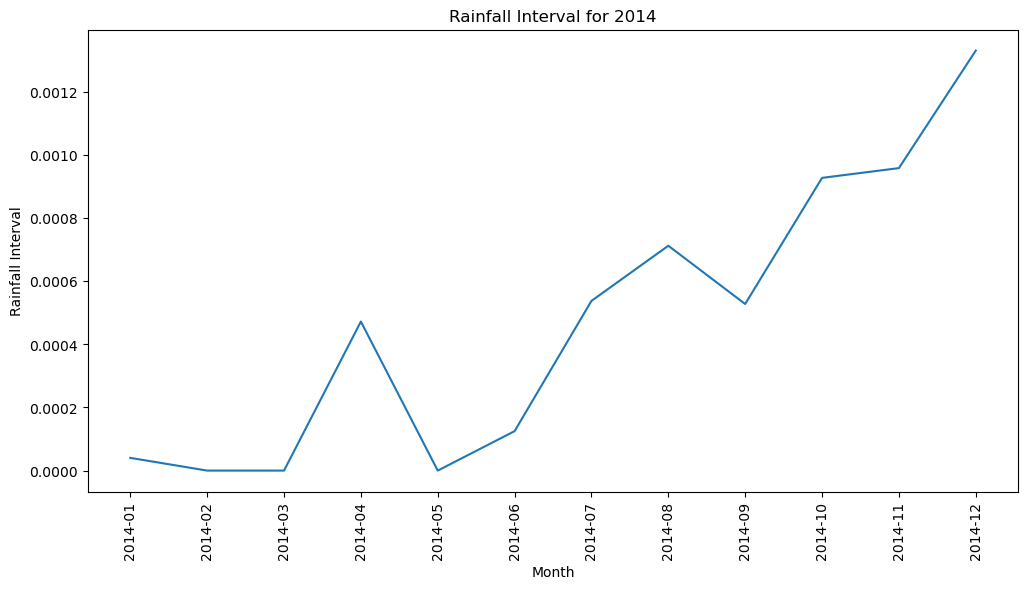

In [19]:
# Filter the dataframe for entries in the year 2014
year_2014 = monthly_avg_rainfall[monthly_avg_rainfall['year_month'].str.startswith('2014')]

# Create a line chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(year_2014['year_month'], year_2014['rainfall_interval'])

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Rainfall Interval')
ax.set_title('Rainfall Interval for 2014')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

### 2015

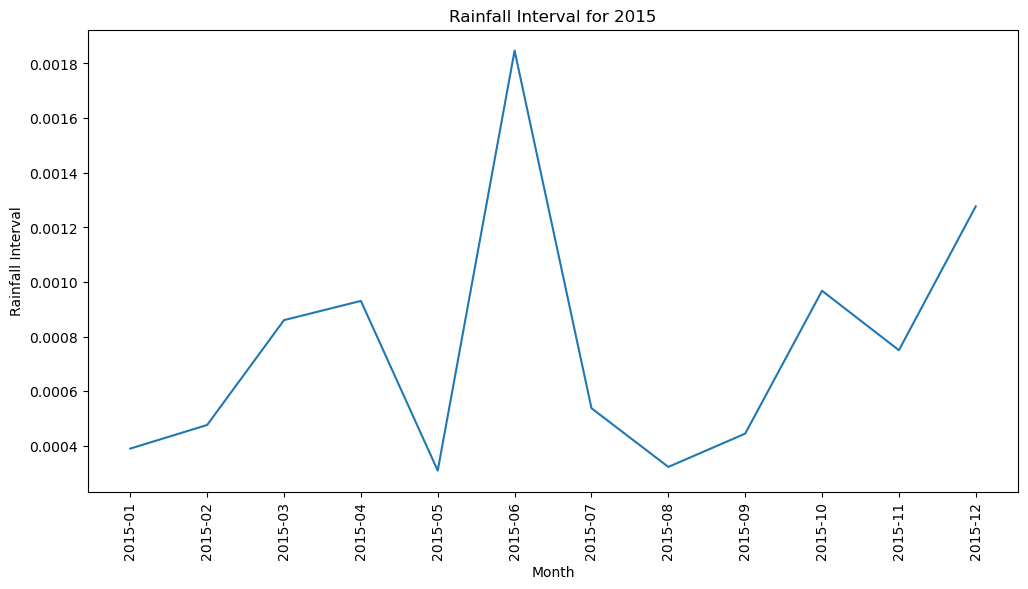

In [21]:
year_2015 = monthly_avg_rainfall[monthly_avg_rainfall['year_month'].str.startswith('2015')]

# Create a line chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(year_2015['year_month'], year_2015['rainfall_interval'])

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Rainfall Interval')
ax.set_title('Rainfall Interval for 2015')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

### 2016

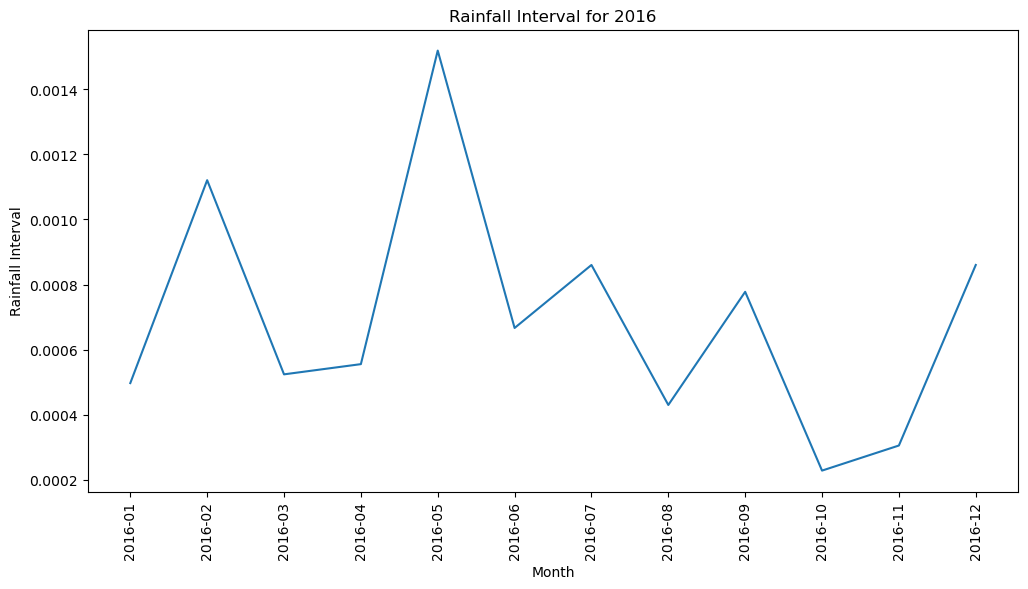

In [22]:
year_2016 = monthly_avg_rainfall[monthly_avg_rainfall['year_month'].str.startswith('2016')]

# Create a line chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(year_2016['year_month'], year_2016['rainfall_interval'])

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Rainfall Interval')
ax.set_title('Rainfall Interval for 2016')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

### 2017

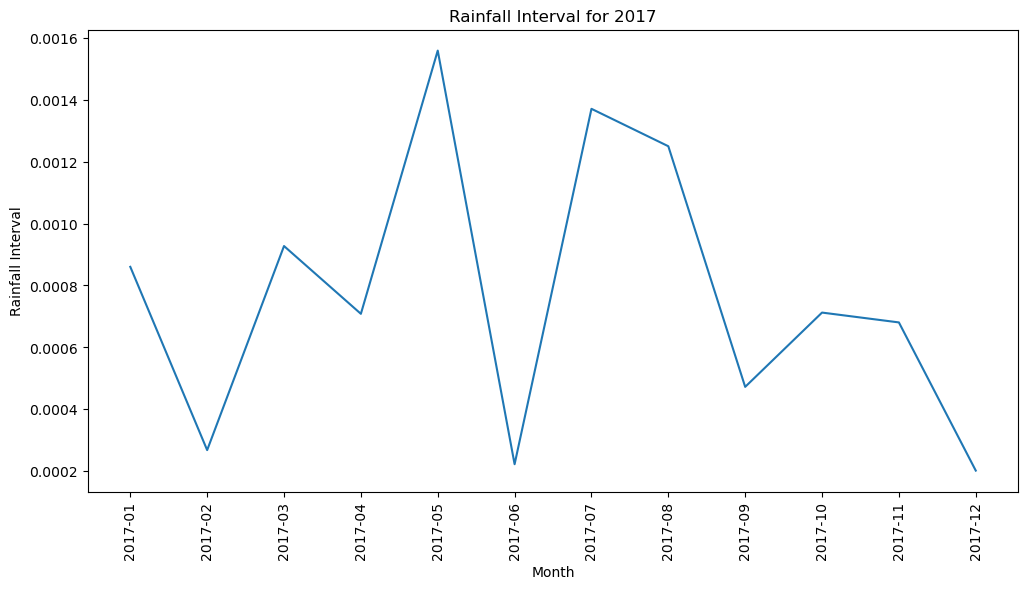

In [23]:
year_2017 = monthly_avg_rainfall[monthly_avg_rainfall['year_month'].str.startswith('2017')]

# Create a line chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(year_2017['year_month'], year_2017['rainfall_interval'])

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Rainfall Interval')
ax.set_title('Rainfall Interval for 2017')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

### 2018

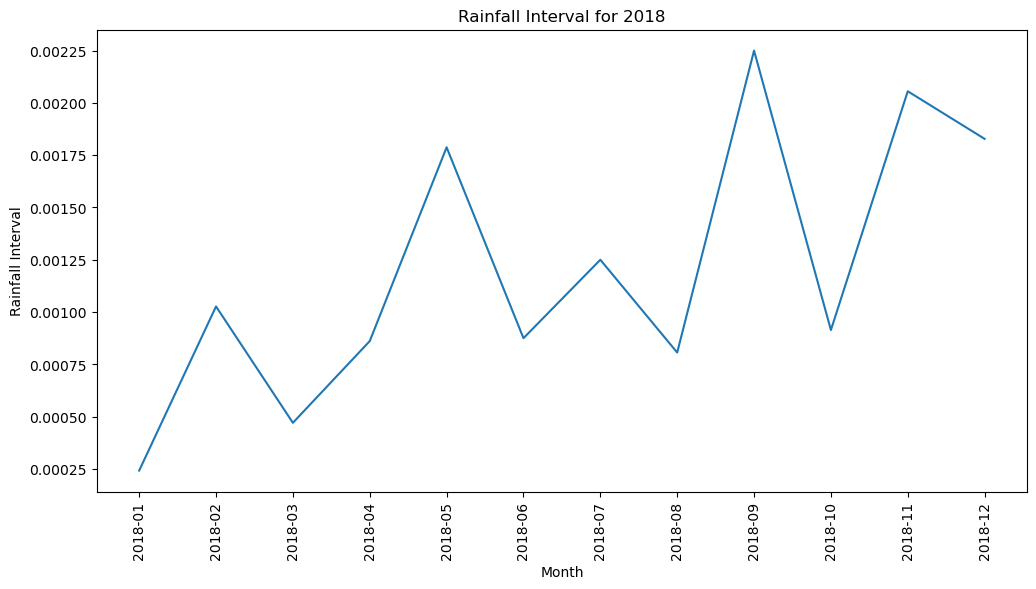

In [24]:
year_2018 = monthly_avg_rainfall[monthly_avg_rainfall['year_month'].str.startswith('2018')]

# Create a line chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(year_2018['year_month'], year_2018['rainfall_interval'])

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Rainfall Interval')
ax.set_title('Rainfall Interval for 2018')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

### 2019

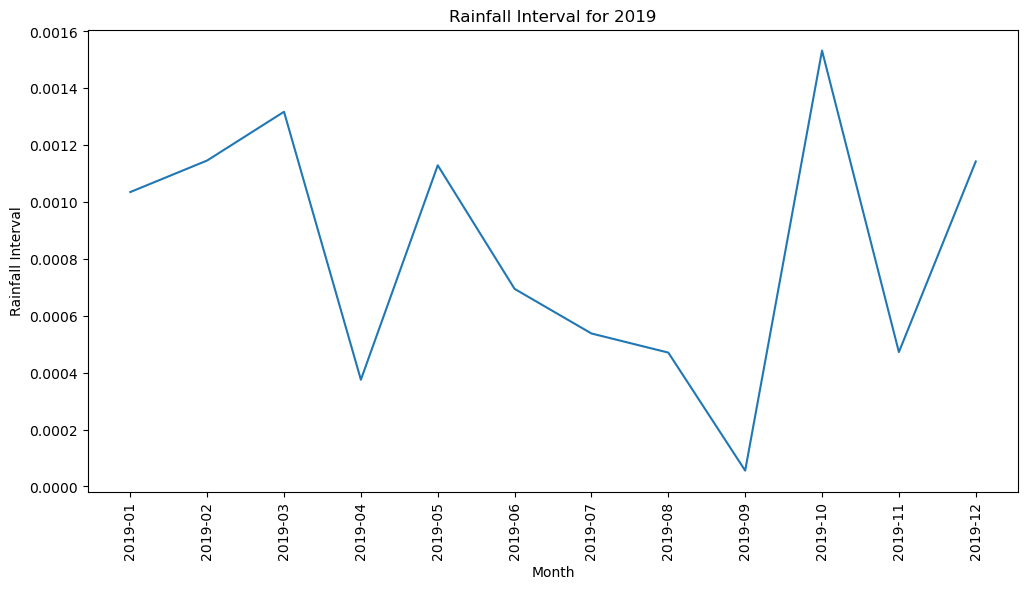

In [25]:
year_2019 = monthly_avg_rainfall[monthly_avg_rainfall['year_month'].str.startswith('2019')]

# Create a line chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(year_2019['year_month'], year_2019['rainfall_interval'])

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Rainfall Interval')
ax.set_title('Rainfall Interval for 2019')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

### 2020

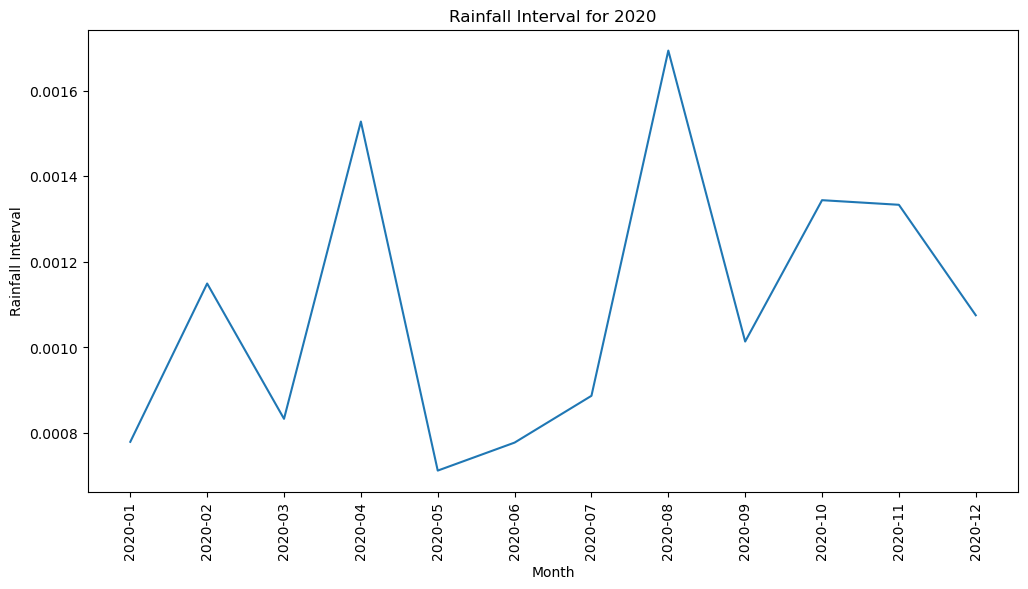

In [26]:
year_2020 = monthly_avg_rainfall[monthly_avg_rainfall['year_month'].str.startswith('2020')]

# Create a line chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(year_2020['year_month'], year_2020['rainfall_interval'])

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Rainfall Interval')
ax.set_title('Rainfall Interval for 2020')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

### 2021

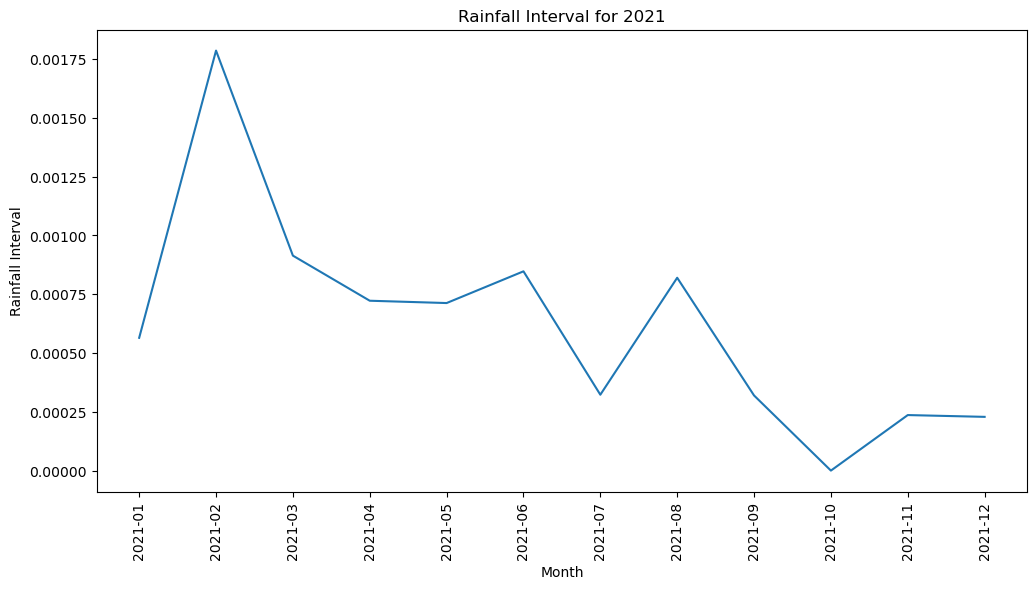

In [27]:
year_2021 = monthly_avg_rainfall[monthly_avg_rainfall['year_month'].str.startswith('2021')]

# Create a line chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(year_2021['year_month'], year_2021['rainfall_interval'])

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Rainfall Interval')
ax.set_title('Rainfall Interval for 2021')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

### 2022

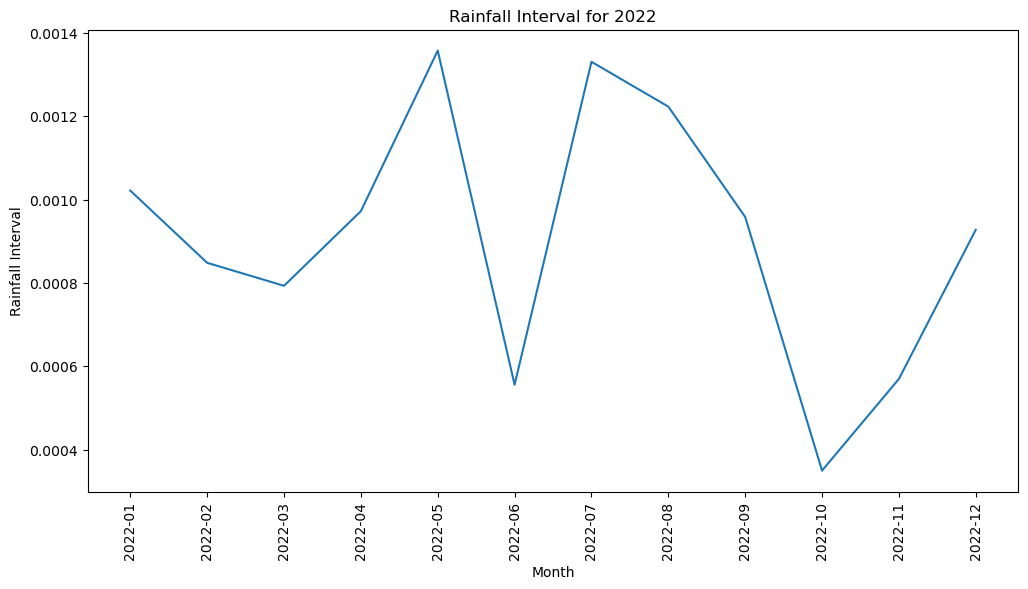

In [28]:
year_2022 = monthly_avg_rainfall[monthly_avg_rainfall['year_month'].str.startswith('2022')]

# Create a line chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(year_2022['year_month'], year_2022['rainfall_interval'])

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Rainfall Interval')
ax.set_title('Rainfall Interval for 2022')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

### 2023

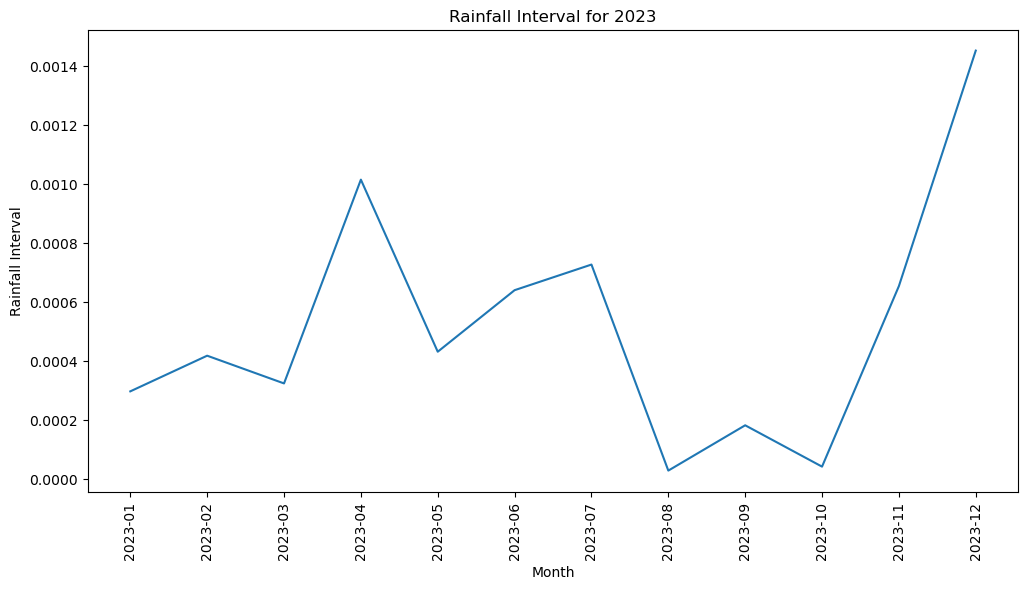

In [29]:
year_2023 = monthly_avg_rainfall[monthly_avg_rainfall['year_month'].str.startswith('2023')]

# Create a line chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(year_2023['year_month'], year_2023['rainfall_interval'])

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Rainfall Interval')
ax.set_title('Rainfall Interval for 2023')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()